In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
dataset_df1 = pd.read_csv(r"./Premonsoon/ground_water_quality_2018_pre.csv")
dataset_df2 = pd.read_csv(r"./Premonsoon/ground_water_quality_2019_pre.csv")
dataset_df3 = pd.read_csv(r"./Premonsoon/ground_water_quality_2020_pre .csv")
dataset_df4 = pd.read_csv(r"./Premonsoon/ground_water_quality_2021_pre.csv")
dataset_df5 = pd.read_csv(r"./Premonsoon/ground_water_quality_2022_pre.csv")
dataset_df6 = pd.read_csv(r"./postmonsoon/ground_water_quality_2018_post.csv")
dataset_df7 = pd.read_csv(r"./postmonsoon/ground_water_quality_2019_post.csv")
dataset_df8 = pd.read_csv(r"./postmonsoon/ground_water_quality_2020_post.csv")
dataset_df9 = pd.read_csv(r"./postmonsoon/ground_water_quality_2021_post.csv")
dataset_df = pd.concat([dataset_df1,dataset_df2,dataset_df3,dataset_df4,dataset_df5,dataset_df6,dataset_df7,dataset_df8,dataset_df9],join='outer',ignore_index=True)
dataset_df.drop(columns=['sno','RL_GIS','sno','village','mandal','district','gwl','Classification.1','season'],inplace=True)

In [24]:
dataset_df['pH'] = pd.to_numeric(dataset_df['pH'], errors='coerce')

# Now convert to float
dataset_df['pH'] = dataset_df['pH'].astype(float)
dataset_df['RSC  meq  / L'] = pd.to_numeric(dataset_df['RSC  meq  / L'], errors='coerce')

# Now convert to float
dataset_df['RSC  meq  / L'] = dataset_df['RSC  meq  / L'].astype(float)

In [25]:
null_threshold = len(dataset_df) * 0.25
for column in dataset_df.columns:
    null_count = dataset_df[column].isnull().sum()
    if null_count > null_threshold:
        dataset_df.drop(column, axis=1, inplace=True)
    elif null_count > 0:
        dataset_df.dropna(subset=[column], inplace=True)
dataset_df.reset_index(drop=True, inplace=True)

In [26]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4931 entries, 0 to 4930
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   long_gis        4931 non-null   float64
 1   lat_gis         4931 non-null   float64
 2   pH              4931 non-null   float64
 3   E.C             4931 non-null   float64
 4   TDS             4931 non-null   float64
 5   CO3             4931 non-null   float64
 6   HCO3            4931 non-null   float64
 7   Cl              4931 non-null   float64
 8   F               4931 non-null   float64
 9   NO3             4931 non-null   float64
 10  SO4             4931 non-null   float64
 11  Na              4931 non-null   float64
 12  K               4931 non-null   float64
 13  Ca              4931 non-null   float64
 14  Mg              4931 non-null   float64
 15  T.H             4931 non-null   float64
 16  SAR             4931 non-null   float64
 17  Classification  4931 non-null   o

In [27]:
dataset_df_classification = dataset_df['Classification']
dataset_df.drop(columns=['Classification'],inplace=True)

## <b> Principal component analysis

In [28]:
# standardising the data
dataset_mean = dataset_df.mean()
dataset_std = dataset_df.std()
dataset_df = (dataset_df - dataset_mean) / dataset_std

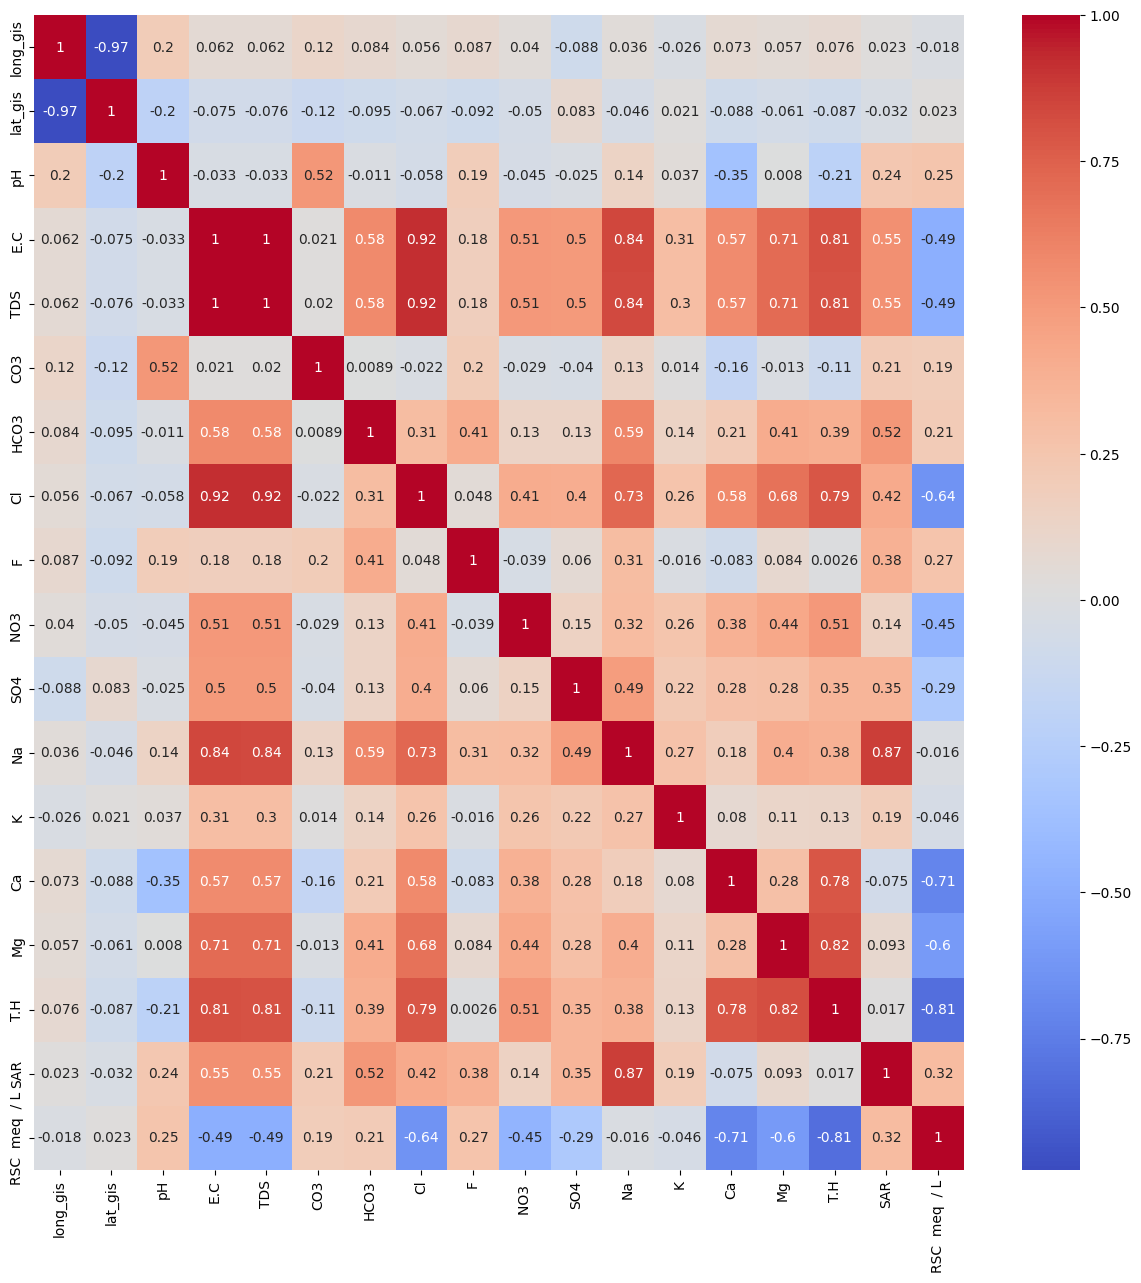

In [29]:
# Covariance matrix computation
corr_mat = dataset_df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

In [30]:
# Eigen decomposition
eigen_values, eigen_vectors = np.linalg.eig(corr_mat)
print('Eigen values:\n', eigen_values)
print('Eigen values Shape:', eigen_values.shape)
print('Eigen Vector Shape:', eigen_vectors.shape)

Eigen values:
 [6.68813864e+00 3.00877114e+00 2.08851106e+00 1.27852366e+00
 1.08341627e+00 8.91992172e-01 7.00826840e-01 6.70506618e-01
 6.11514021e-01 4.71587763e-01 3.93695810e-01 6.71681515e-02
 2.49526458e-02 1.29725436e-02 4.25738353e-03 2.64797449e-04
 1.36558883e-03 1.53489363e-03]
Eigen values Shape: (18,)
Eigen Vector Shape: (18, 18)


In [31]:
# Index the eigenvalues in descending order 
idx = eigen_values.argsort()[::-1]
 
# Sort the eigenvalues in descending order 
eigen_values = eigen_values[idx]
 
# sort the corresponding eigenvectors accordingly
eigen_vectors = eigen_vectors[:,idx]

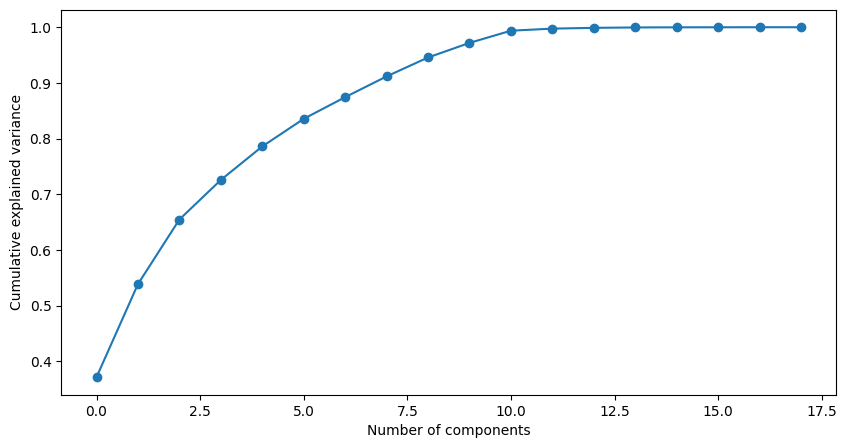

In [32]:
# first we consider each column as principal component and then we observe elbow point /cutoff point
explained_var = np.cumsum(eigen_values) / np.sum(eigen_values)
plt.figure(figsize=(10, 5))
plt.plot(explained_var, 'o-')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [33]:
# retain only those components which explain >=90% of the variance
n_components = np.argmax(explained_var >= 0.90) + 1
n_components

8

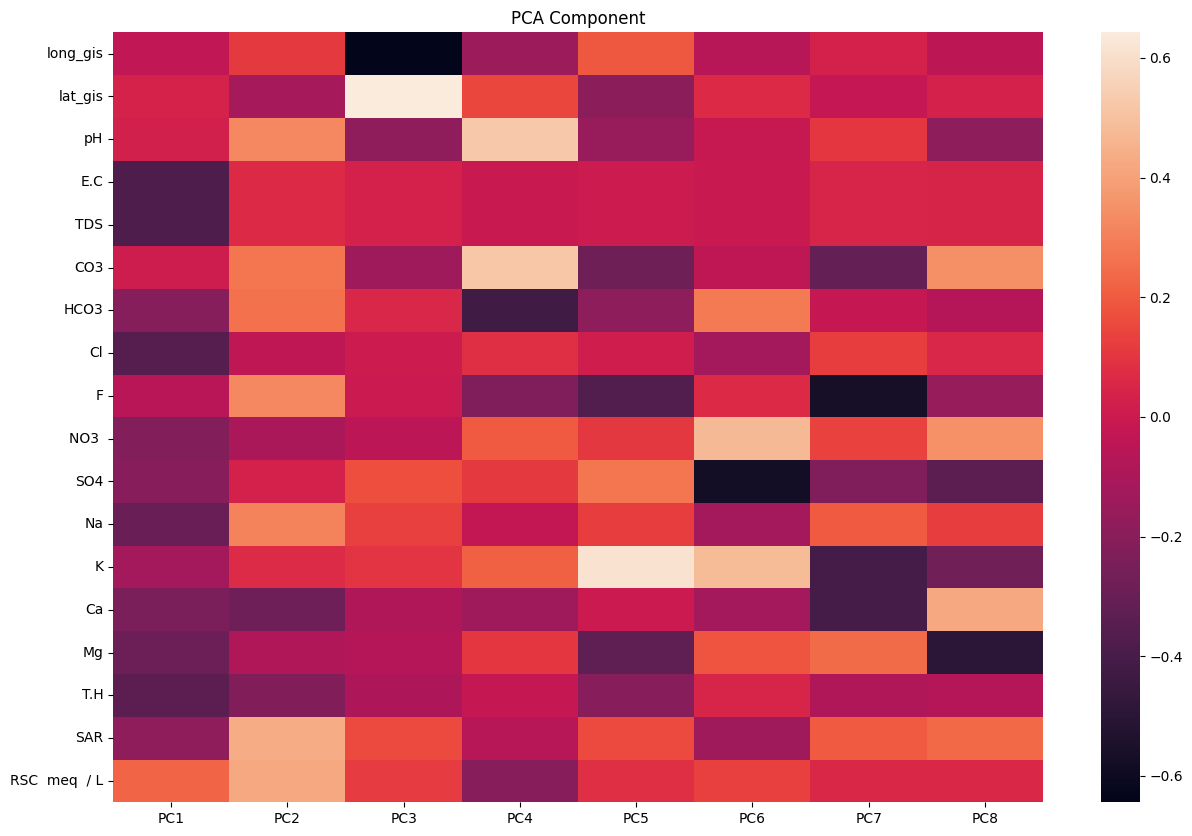

In [34]:

# PCA component or unit matrix
u = eigen_vectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = dataset_df.columns,
                             columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']
                            )
# plotting heatmap
plt.figure(figsize =(15, 10))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

In [35]:
# data projection
dataset_projected = dataset_df @ pca_component
print(dataset_projected.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.242828 -1.034493 -0.908909  1.071783 -0.207723 -0.363631  0.894638   
1 -1.865118 -0.836295 -0.895838  0.768590  0.264140  0.581824  0.260887   
2  0.634421  0.398214 -1.410996  1.988549 -1.210042 -0.135922 -0.438385   
3  2.286736  0.499016 -0.662587 -0.054790  0.291652 -0.180719  0.205673   
4  2.267561  0.560042 -0.745097  0.091726  0.188888  0.129086 -0.015100   

        PC8  
0 -1.619584  
1 -0.664959  
2 -0.038015  
3 -0.224595  
4 -0.474906  


In [36]:
# using sci-kit learn
# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components=8)
pca.fit(dataset_df)
x_pca = pca.transform(dataset_df)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
					columns=['PC{}'.
					format(i+1)
						for i in range(n_components)])
print(df_pca1)


           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     1.242828 -1.034493 -0.908909  1.071783  0.207723 -0.363631 -0.894638   
1     1.865118 -0.836295 -0.895838  0.768590 -0.264140  0.581824 -0.260887   
2    -0.634421  0.398214 -1.410996  1.988549  1.210042 -0.135922  0.438385   
3    -2.286736  0.499016 -0.662587 -0.054790 -0.291652 -0.180719 -0.205673   
4    -2.267561  0.560042 -0.745097  0.091726 -0.188888  0.129086  0.015100   
...        ...       ...       ...       ...       ...       ...       ...   
4926 -1.290632 -1.174414  2.736811  0.190303  0.187630 -0.822854  0.793870   
4927  2.513890 -2.660652  1.922405  1.002585  2.170105 -0.003030 -0.208765   
4928  9.582811 -3.925766  3.041318  2.489364 -0.421758 -5.614276  1.229203   
4929 -1.604053  0.156840  2.885366  0.278167  0.664107 -0.518740  0.299496   
4930 -1.758661 -1.450230  2.395584  0.362748  0.524805  0.482796  0.635704   

           PC8  
0     1.619584  
1     0.664959  
2     0.0380

In [37]:
dataset_projected['Classification'] = dataset_df_classification
dataset_projected.to_csv('Reduced_features_dataset.csv', index=False)
